In [77]:
#The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of 
#Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 
#https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('/Users/mayurakshilondhe/Downloads/haberman.csv')

In [80]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [81]:
df.shape

(305, 4)

In [82]:
#Adding column names to the dataframe
df.columns=['Age','Year','Axil_nodes','Surv_status']

In [83]:
df.head()

,Age,Year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age            305 non-null int64
Year           305 non-null int64
Axil_nodes     305 non-null int64
Surv_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [85]:
df.nunique()

Age            49
Year           12
Axil_nodes     31
Surv_status     2
dtype: int64

<h2>Univariate Analysis</h2>

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


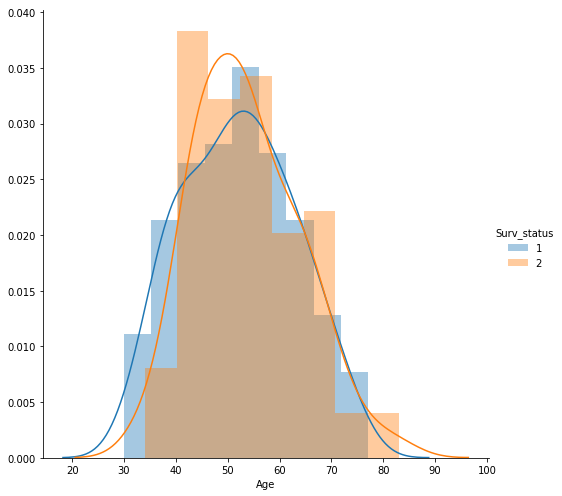

In [86]:
#Histogram, PDF, CDF
sns.FacetGrid(df, hue='Surv_status',size=7).map(sns.distplot,"Age").add_legend();
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


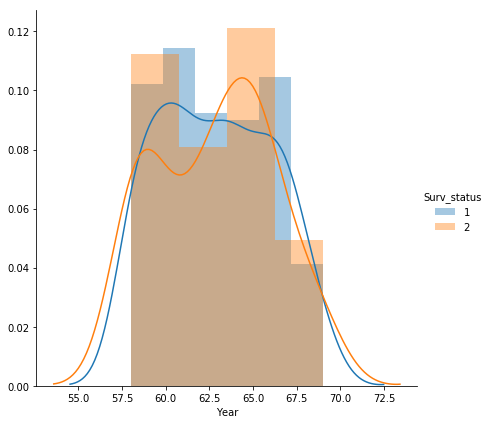

In [87]:
sns.FacetGrid(df,hue="Surv_status",size=6).map(sns.distplot,"Year").add_legend()

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


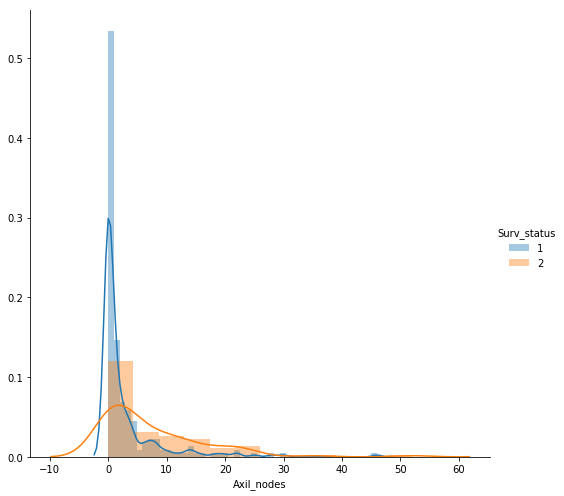

In [88]:
sns.FacetGrid(df, hue="Surv_status",size=7).map(sns.distplot,"Axil_nodes").add_legend()
plt.show()

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


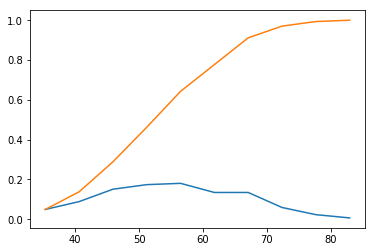

In [89]:
#CDF
counts, bin_edges = np.histogram(df['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


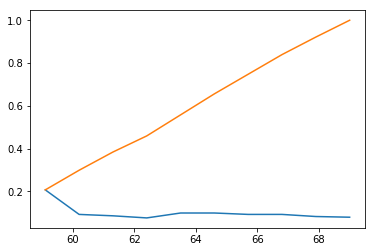

In [90]:
counts, bin_edges = np.histogram(df['Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()

In [91]:
print("Means:")
print(np.mean(df["Age"]))
print(np.mean(df["Year"]))
print(np.mean(df["Axil_nodes"]))

print("\nMedian:")
print(np.median(df["Age"]))
print(np.median(df["Year"]))
print(np.median(df["Axil_nodes"]))

print("\nStandard Deviation:")
print(np.std(df["Age"]))
print(np.std(df["Year"]))
print(np.std(df["Axil_nodes"]))

Means:
52.5311475409836
62.84918032786885
4.036065573770492

Median:
52.0
63.0
1.0

Standard Deviation:
10.726396748570311
3.2487386178063162
7.187558302814359


<h2>Multivariate Analysis</h2>

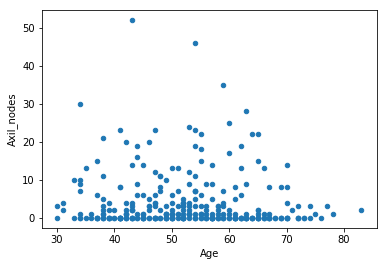

In [96]:
df.plot(kind='scatter', x='Age',y='Axil_nodes');

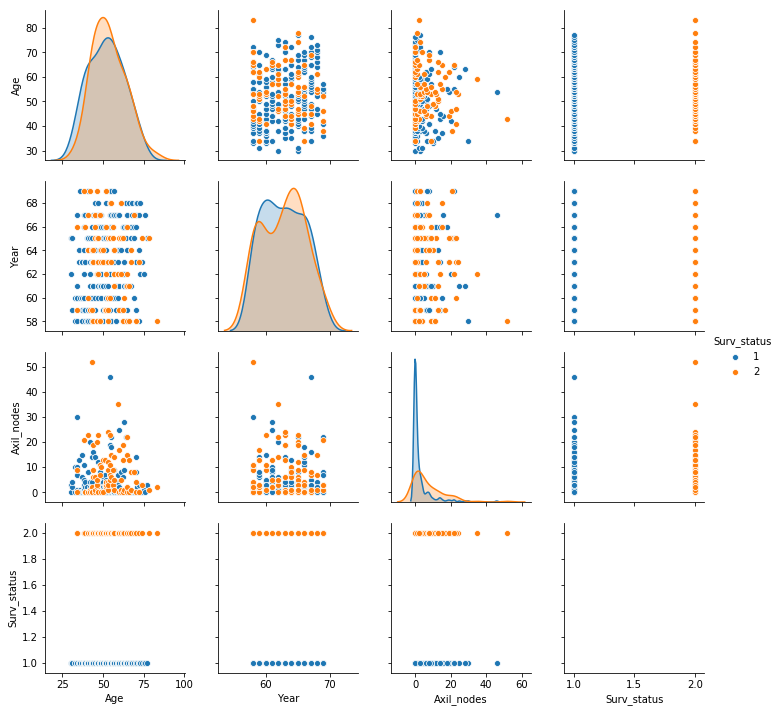

'Survival status (class attribute)\n1 = the patient survived 5 years or longer\n2 = the patient died within 5 year'

In [97]:
sns.pairplot(df, hue="Surv_status")
plt.show()
#Diagonals are pdf for each of the features
'''Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year'''

In [98]:
df.corr()

,Age,Year,Axil_nodes,Surv_status
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Axil_nodes,-0.066548,-0.003277,1.000000,0.286191
Surv_status,0.064351,-0.004076,0.286191,1.000000


<b>Boxplot

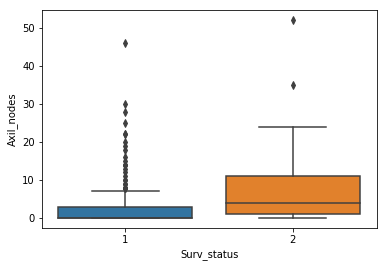

In [99]:
sns.boxplot(x='Surv_status', y='Axil_nodes', data=df)
plt.show()

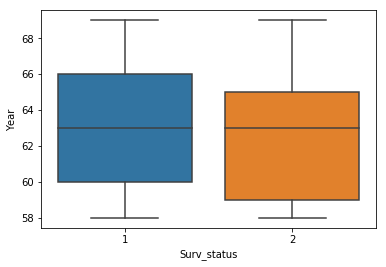

In [100]:
sns.boxplot(x='Surv_status', y='Year', data=df)
plt.show()

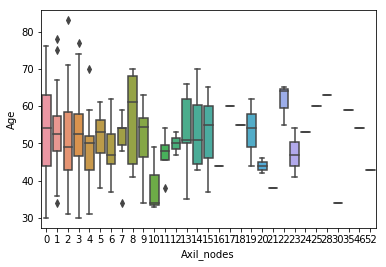

In [101]:
sns.boxplot(x='Axil_nodes', y='Age', data=df)
plt.show()

<b>Violin plots<b>

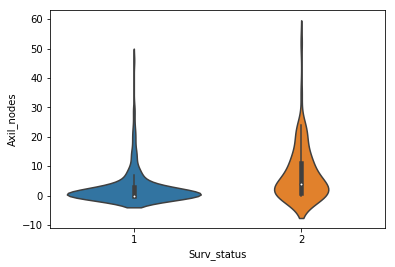

In [102]:
sns.violinplot(x='Surv_status', y="Axil_nodes", data=df)
plt.show()

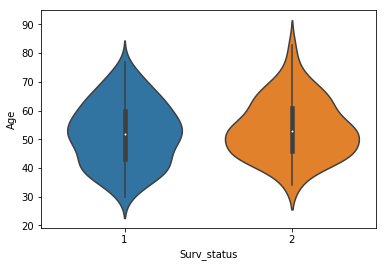

In [103]:
sns.violinplot(x='Surv_status', y="Age", data=df)
plt.show()

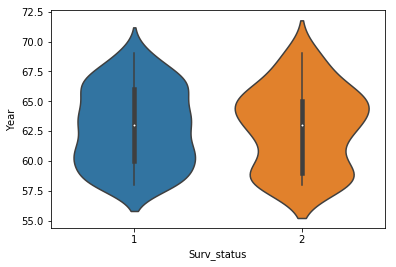

In [104]:
sns.violinplot(x='Surv_status', y="Year", data=df)
plt.show()

<b>Contour plot</b>

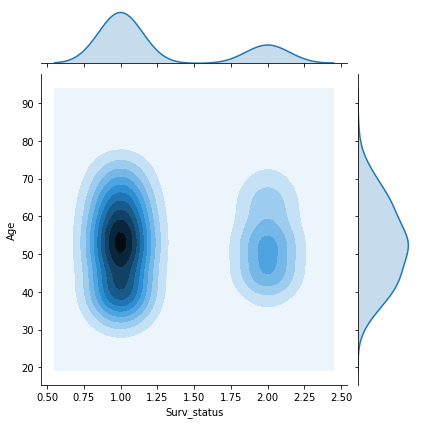

In [105]:
sns.jointplot(x='Surv_status',y='Age',data=df,kind='kde');

Observation:  
    The patients who couldn't survive for more than 5 years have age in the range of 40 to 65 years
    The patients who couldn't survive more than 5 years had more auxillary nodes than patient who survied for 5 years.
    
    
Conclusion:   
        The dataset is imbalanced. Most of the data is of patients who survived more than 5 years.
Patients with more than 4 auxillary nodes are more susceptible to die within 5 years.



Thank you!